# Edge detection
In clesperanto, multiple filters for edge-detection are implemented.

See also
* [Wikipedia](https://en.wikipedia.org/wiki/Edge_detection)

In [1]:
import pyclesperanto_prototype as cle
from skimage.io import imread
import matplotlib.pyplot as plt

cle.select_device("RTX")

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

cl.OCLArray([[ 40.,  32.,  24., ..., 216., 200., 200.],
       [ 56.,  40.,  24., ..., 232., 216., 216.],
       [ 64.,  48.,  24., ..., 240., 232., 232.],
       ...,
       [ 72.,  80.,  80., ...,  48.,  48.,  48.],
       [ 80.,  80.,  80., ...,  48.,  48.,  48.],
       [ 96.,  88.,  80., ...,  48.,  48.,  48.]], dtype=float32)
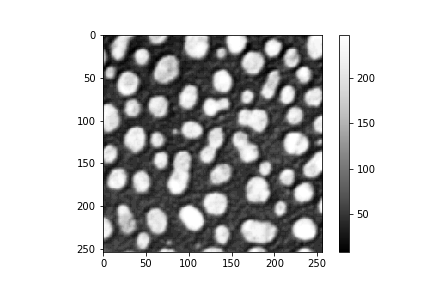
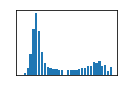

In [2]:
blobs = cle.asarray(imread("../../data/blobs.tif"))
blobs

## Sobel operator
[see also](https://en.wikipedia.org/wiki/Sobel_operator)

cl.OCLArray([[ 68.818596,  86.162636,  40.792156, ..., 132.42355 ,  90.50967 ,
         64.      ],
       [104.307236, 132.42355 ,  60.92618 , ..., 124.45079 , 132.42355 ,
        128.      ],
       [ 67.88225 , 120.266365,  57.68882 , ...,  68.818596,  68.818596,
         64.      ],
       ...,
       [ 60.92618 ,  46.647614,  32.      , ...,   0.      ,   0.      ,
          0.      ],
       [ 80.      ,  40.792156,  11.313708, ...,   0.      ,   0.      ,
          0.      ],
       [ 60.92618 ,  57.68882 ,  25.298222, ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)
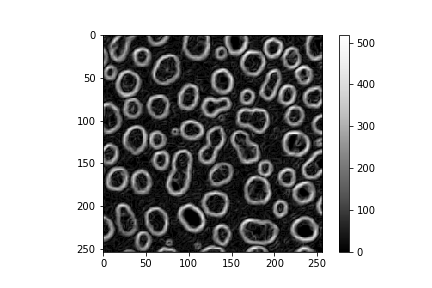
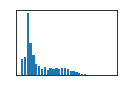

In [3]:
blobs_sobel = cle.sobel(blobs)
blobs_sobel

## Laplace operator
[see also](https://en.wikipedia.org/wiki/Discrete_Laplace_operator)

cl.OCLArray([[-16., -24., -32., ..., -40., -96., -48.],
       [ 64.,   8., -56., ...,  40., -40.,   0.],
       [128.,  64., -88., ...,  40.,  16.,  48.],
       ...,
       [-16.,  40.,  24., ...,   0.,   0.,   0.],
       [-24., -16.,  -8., ...,   0.,   0.,   0.],
       [ 64.,  24., -16., ...,   0.,   0.,   0.]], dtype=float32)
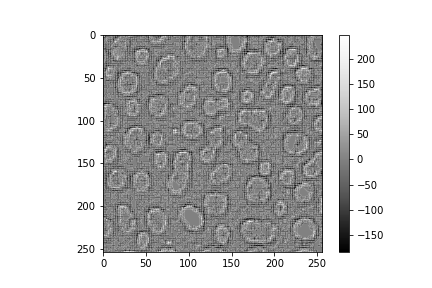
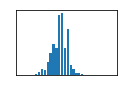

In [4]:
blobs_laplace = cle.laplace_box(blobs)
blobs_laplace

## Laplacian of Gaussian
[Also kown as the Mexican hat filter](https://en.wikipedia.org/wiki/Ricker_wavelet)

cl.OCLArray([[ 4.02929688e+00, -1.20734653e+01, -1.87678566e+01, ...,
        -2.40719757e+01, -4.25648804e+01, -4.31172333e+01],
       [ 3.86635933e+01,  7.33655357e+00, -1.46393909e+01, ...,
         1.70013428e-01, -1.11199493e+01, -1.08789215e+01],
       [ 4.83128510e+01,  1.65370464e+01, -9.00197601e+00, ...,
         1.08173676e+01,  5.59048462e+00,  7.35755920e+00],
       ...,
       [-9.95873260e+00,  2.25834656e+00,  8.71430206e+00, ...,
        -3.46527100e-02, -6.58416748e-02, -8.79592896e-02],
       [ 3.15553284e+00,  4.33897400e+00,  6.17755127e+00, ...,
         9.42230225e-04, -2.07901001e-03, -2.76565552e-03],
       [ 2.85552521e+01,  1.43040466e+01,  5.40963745e+00, ...,
         2.76184082e-03,  0.00000000e+00,  0.00000000e+00]], dtype=float32)
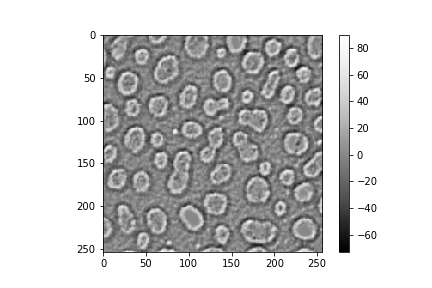
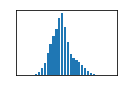

In [5]:
blobs_laplacian_of_gaussian = cle.laplace_box(cle.gaussian_blur(blobs, sigma_x=1, sigma_y=1))
blobs_laplacian_of_gaussian

cl.OCLArray([[ 0.7280884 , -2.0713882 , -2.746048  , ..., -2.332962  ,
        -3.2955475 , -8.296341  ],
       [ 1.8013878 , -0.4489746 , -0.7979126 , ...,  1.9602203 ,
         1.2944183 , -3.1305084 ],
       [ 1.3617897 , -0.51296234, -0.8673668 , ...,  2.0793152 ,
         1.4771423 , -2.5575256 ],
       ...,
       [ 2.927681  ,  0.15546417,  0.13283539, ..., -1.057312  ,
        -0.77157974, -1.240757  ],
       [ 3.7949524 ,  0.58218384,  0.5138016 , ..., -1.1535149 ,
        -0.86091614, -1.5314217 ],
       [10.268135  ,  6.2821045 ,  5.694229  , ..., -0.4527855 ,
        -0.52129364, -1.5948601 ]], dtype=float32)
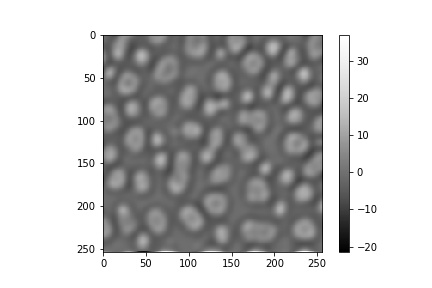
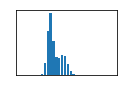

In [6]:
blobs_laplacian_of_gaussian = cle.laplace_box(cle.gaussian_blur(blobs, sigma_x=5, sigma_y=5))
blobs_laplacian_of_gaussian

## Local Variance filter

cl.OCLArray([[1.4995265e+02, 1.4052817e+02, 1.2398716e+02, ..., 3.0728381e+02,
        3.1707550e+02, 3.0995044e+02],
       [1.5246176e+02, 1.4342188e+02, 1.2909299e+02, ..., 2.7081000e+02,
        2.8300577e+02, 2.8180820e+02],
       [1.5338840e+02, 1.4492552e+02, 1.3323695e+02, ..., 2.3150333e+02,
        2.4431119e+02, 2.4681158e+02],
       ...,
       [1.7072482e+02, 1.6290892e+02, 1.5444627e+02, ..., 9.5031595e+00,
        7.5798044e+00, 8.4628143e+00],
       [1.6226210e+02, 1.5775095e+02, 1.5362428e+02, ..., 5.8138118e+00,
        3.0161848e+00, 3.4882882e+00],
       [1.5486595e+02, 1.5207706e+02, 1.5135129e+02, ..., 3.4882951e+00,
        1.4551915e-11, 1.4551915e-11]], dtype=float32)
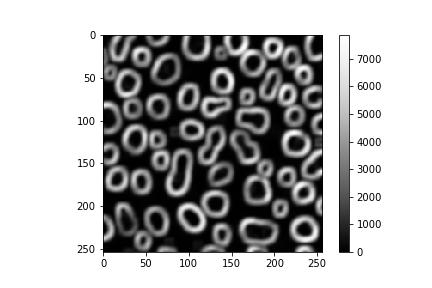
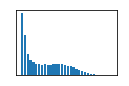

In [7]:
blobs_edges = cle.variance_box(blobs, radius_x=5, radius_y=5)
blobs_edges

# Local standard deviation
... is just the square root of the local variance

cl.OCLArray([[1.22455149e+01, 1.18544579e+01, 1.11349516e+01, ...,
        1.75295124e+01, 1.78066158e+01, 1.76054077e+01],
       [1.23475409e+01, 1.19758873e+01, 1.13619089e+01, ...,
        1.64563065e+01, 1.68227768e+01, 1.67871456e+01],
       [1.23850069e+01, 1.20385017e+01, 1.15428314e+01, ...,
        1.52152328e+01, 1.56304569e+01, 1.57102375e+01],
       ...,
       [1.30661697e+01, 1.27635784e+01, 1.24276409e+01, ...,
        3.08271933e+00, 2.75314450e+00, 2.90909171e+00],
       [1.27382135e+01, 1.25598946e+01, 1.23945255e+01, ...,
        2.41118479e+00, 1.73671675e+00, 1.86769593e+00],
       [1.24445152e+01, 1.23319530e+01, 1.23024921e+01, ...,
        1.86769772e+00, 3.81469727e-06, 3.81469727e-06]], dtype=float32)
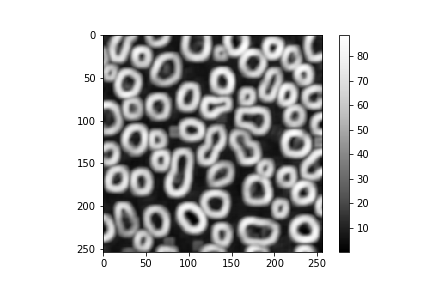
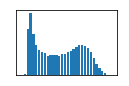

In [8]:
blobs_edges = cle.standard_deviation_box(blobs, radius_x=5, radius_y=5)
blobs_edges

## Edge detection is not edge enhancement
Intuitively, one could apply an edge detection filter to enhance edges in images showing edges. Let's try with an image showing membranes. It's a 3D image btw.

cl.OCLArray([[[ 62.,  90., 110., ...,  64.,  63.,  63.],
        [ 66.,  88., 115., ...,  72.,  57.,  63.],
        [ 60.,  80., 120., ...,  49.,  55.,  46.],
        ...,
        [ 84.,  82.,  61., ...,  39.,  57.,  75.],
        [ 84.,  89.,  68., ...,  52.,  51.,  56.],
        [ 67.,  91.,  67., ...,  50.,  50.,  74.]],

       [[ 70.,  83., 106., ...,  73.,  67.,  65.],
        [ 57.,  97., 112., ...,  74.,  77.,  62.],
        [ 55.,  86., 114., ...,  47.,  56.,  64.],
        ...,
        [110.,  80.,  63., ...,  50.,  47.,  59.],
        [ 98.,  76.,  65., ...,  44.,  57.,  67.],
        [ 88.,  77.,  54., ...,  45.,  55.,  75.]],

       [[ 70.,  84., 109., ...,  55.,  63.,  70.],
        [ 60.,  59., 116., ...,  89.,  60.,  63.],
        [ 55.,  84., 103., ...,  64.,  55.,  59.],
        ...,
        [ 88.,  61.,  56., ...,  38.,  42.,  61.],
        [ 93.,  82.,  45., ...,  40.,  42.,  53.],
        [ 86.,  82.,  55., ...,  40.,  52.,  58.]],

       ...,

       [[ 28.,  36.,  28., ...,  66.,  58.,  58.],
        [ 32.,  39.,  38., ...,  81.,  65.,  58.],
        [ 30.,  34.,  35., ...,  81.,  70.,  79.],
        ...,
        [ 53.,  50.,  62., ...,  43.,  55.,  65.],
        [ 53.,  69.,  65., ...,  49.,  55.,  57.],
        [ 58.,  69.,  72., ...,  44.,  68.,  45.]],

       [[ 34.,  47.,  36., ...,  68.,  63.,  53.],
        [ 37.,  46.,  35., ...,  88.,  78.,  55.],
        [ 33.,  42.,  47., ...,  85.,  66.,  78.],
        ...,
        [ 56.,  56.,  58., ...,  61.,  69.,  68.],
        [ 56.,  58.,  59., ...,  49.,  49.,  56.],
        [ 56.,  74.,  70., ...,  47.,  56.,  63.]],

       [[ 35.,  36.,  33., ...,  63.,  75.,  48.],
        [ 38.,  42.,  39., ...,  81.,  66.,  56.],
        [ 40.,  41.,  41., ...,  90.,  70.,  70.],
        ...,
        [ 45.,  60.,  59., ...,  70.,  59.,  86.],
        [ 51.,  69.,  59., ...,  53.,  65.,  56.],
        [ 65.,  61.,  67., ...,  57.,  54.,  60.]]], dtype=float32)
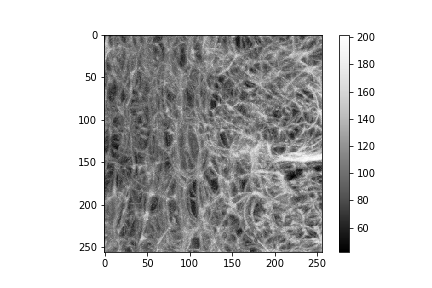
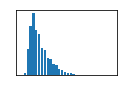

In [9]:
image = cle.asarray(imread("../../data/EM_C_6_c0.tif"))
image

cl.OCLArray([[36., 39., 25., ..., 63., 35., 30.],
       [28., 35., 34., ..., 65., 49., 35.],
       [33., 30., 33., ..., 74., 60., 41.],
       ...,
       [82., 91., 94., ..., 27., 34., 30.],
       [80., 92., 83., ..., 28., 28., 23.],
       [85., 73., 52., ..., 33., 31., 26.]], dtype=float32)
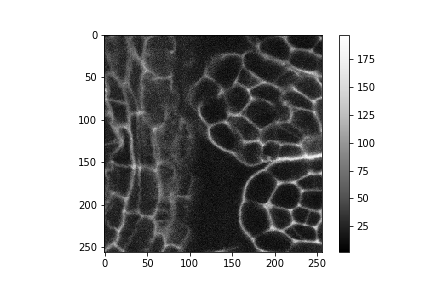
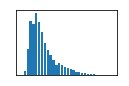

In [10]:
image[60]

cl.OCLArray([[ 467.6377 ,  529.6291 ,  501.43494, ..., 1274.7905 ,  861.8132 ,
         549.9536 ],
       [ 496.90442,  551.1751 ,  555.1315 , ..., 1050.9562 ,  884.59875,
         621.87134],
       [ 521.2945 ,  535.5567 ,  553.9251 , ...,  866.0912 ,  929.78815,
         716.3609 ],
       ...,
       [1257.6001 , 1352.3776 , 1423.3826 , ...,  496.57224,  498.16162,
         445.97534],
       [1323.187  , 1385.4432 , 1415.437  , ...,  526.2984 ,  506.63892,
         406.82553],
       [1587.4546 , 1534.6759 , 1342.625  , ...,  452.37375,  431.55997,
         338.377  ]], dtype=float32)
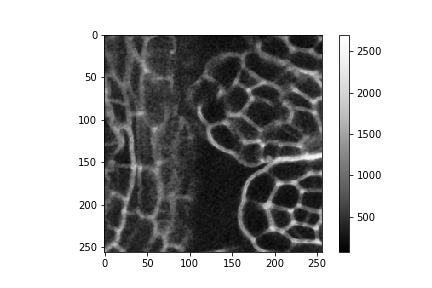
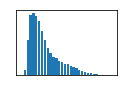

In [11]:
image_sobel = cle.sobel(image)
image_sobel[60]

When looking very carefully, you may observe that the edges are a bit thicker in the second image. The edge detection filter detects two edges, the increasing signal side of the membrane and the decreasing signal on the opposite side. Let's zoom:

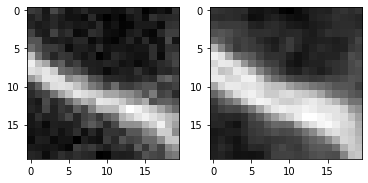

In [12]:
fig, axs = plt.subplots(1, 2)
cle.imshow(                image[60, 125:145, 135:155], plot=axs[0])
cle.imshow(cle.pull(image_sobel)[60, 125:145, 135:155], plot=axs[1])

## Enhancing edges
Thus, to enhance edges in a membrane image, other filters are more useful. Enhancement may for example mean making membranes thicker and potentially closing gaps.

## Local standard deviation

cl.OCLArray([[ 7.2811127,  8.134171 ,  9.307512 , ..., 22.200243 , 22.482307 ,
        22.947567 ],
       [ 7.5273857,  8.278003 ,  9.340383 , ..., 22.438185 , 22.56258  ,
        22.862795 ],
       [ 7.616371 ,  8.273025 ,  9.217965 , ..., 22.246208 , 22.198236 ,
        22.322102 ],
       ...,
       [21.216778 , 21.85669  , 22.474318 , ...,  5.8944054,  6.05584  ,
         6.110779 ],
       [20.41613  , 21.406458 , 22.281708 , ...,  4.99587  ,  5.0696263,
         5.0190578],
       [19.928556 , 21.22558  , 22.26661  , ...,  4.812277 ,  4.8982363,
         4.8279533]], dtype=float32)
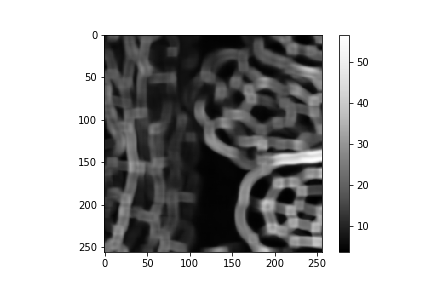
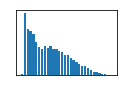

In [13]:
image_std = cle.standard_deviation_box(image, radius_x=5, radius_y=5, radius_z=5)
image_std[60]

## Local maximum

cl.OCLArray([[ 81.,  81.,  81., ..., 116., 116., 116.],
       [ 81.,  81.,  81., ..., 116., 116., 116.],
       [ 81.,  81.,  81., ..., 116., 116., 116.],
       ...,
       [126., 126., 126., ...,  52.,  52.,  52.],
       [126., 126., 126., ...,  44.,  44.,  44.],
       [126., 126., 126., ...,  44.,  44.,  44.]], dtype=float32)
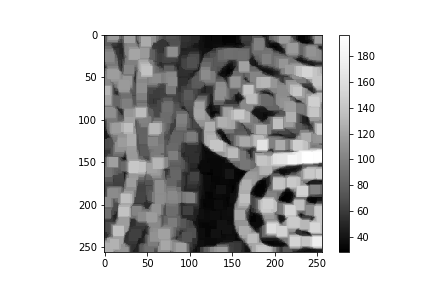
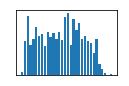

In [14]:
image_max = cle.maximum_box(image, radius_x=5, radius_y=5, radius_z=5)
image_max[60]